In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explain Supervised vs. Unsupervised

**Supervised** : Definition:
Supervised learning is when the machine is trained using labeled data. That means the input data is already tagged with the correct output.  

**Unsupervised** Definition:
Unsupervised learning is when the machine is given unlabeled data. The system tries to find patterns or structure in the data on its own.



# **2.Presentation: How Regression Models are used in Business**

Forecasting sales and revenue

Market trend analysis

Customer behavior prediction

Risk assessment

Pricing optimization



# **Practical Tasks**

# **Task 1: House Price Prediction**

In [13]:
data1 = pd.read_csv("/content/Bangalore.csv")
data1

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


# **1)Perform EDA**

In [14]:
data1.isnull().sum()

,0
Price,0
Area,0
Location,0
No. of Bedrooms,0
Resale,0
MaintenanceStaff,0
Gymnasium,0
SwimmingPool,0
LandscapedGardens,0
JoggingTrack,0


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [16]:
data1.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7c2f042a2590>,
 'caps': [<matplotlib.lines.Line2D at 0x7c2eb30526d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c2eb305add0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c2eb3050810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c2eb3052910>],
 'means': []}

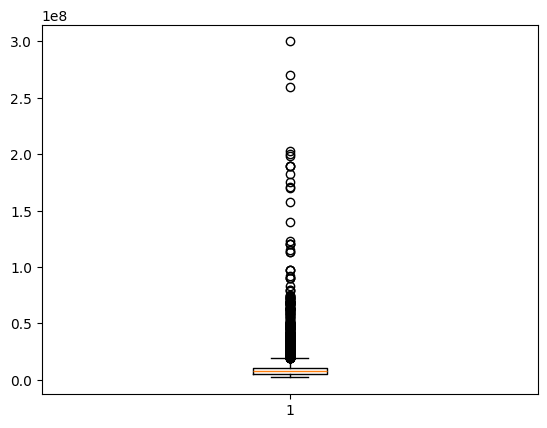

In [17]:
plt.boxplot(data1["Price"])

In [18]:
import scipy.stats as stats

In [21]:
z=np.abs(stats.zscore(data1["Price"]))
len(z)
z

array([1.37613311, 0.19117153, 0.40537172, ..., 0.22767487, 0.39693697,
       0.02231986])

In [25]:
there = 2
outt =np.where(z>there)
print("outlier" , outt)


outlier (array([  99,  330,  804,  805,  806,  807,  808,  811,  812,  813,  814,
        815,  816,  817,  818,  819,  820,  821,  822,  901,  964,  965,
        995, 1049, 1050, 1051, 1096, 1194, 1225, 1245, 1618, 1619, 1620,
       1725, 1727, 1728, 1771, 1780, 1837, 1838, 1846, 1870, 1921, 1923,
       1926, 2127, 2129, 2177, 2180, 2181, 2236, 2239, 2241, 2242, 2246,
       2247, 2249, 2312, 2526, 2710, 2711, 2712, 2736, 2737, 2738, 2739,
       2754, 2847, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
       2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
       2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 3155,
       3158, 3163, 3193, 3199, 3220, 3410, 3417, 3472, 3506, 3514, 3515,
       3521, 3522, 3529, 3900, 3901, 3929, 3932, 4019, 4052, 4060, 4062,
       4064, 4066, 4067, 4068, 4069, 4071, 4073, 4074, 4077, 4078, 4112,
       4113, 4138, 4184, 4198, 4259, 4471, 4573, 4787, 4833, 4834, 4941,
       4962, 4993, 5039, 5041, 5043, 5045,

In [ ]:
data1 = data1.drop(outt[0])

# **2. Build a Simple Linear Regression model to predict the Sale price of the house. Use Area as the independent variable**

In [ ]:
data1

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data1["Location"] = l.fit_transform(data1["Location"])
data1

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,130,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,79,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,165,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,84,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,171,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,69,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,167,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,167,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,167,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
x =data1[["Area"]]
y = data1["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Area
1513,1520
4845,759
5938,2425
2886,1332
4276,1400
...,...
3885,1402
5343,1500
5384,6330
5551,995


In [ ]:
x_test

,Area
2037,1269
1155,2170
1274,1330
1783,708
4209,1090
...,...
6110,1250
5971,1284
3867,1170
4745,1367


In [ ]:
y_test

,Price
2037,5503000
1155,15600000
1274,11800000
1783,3872999
4209,4450000
...,...
6110,8789000
5971,6700000
3867,4100000
4745,5814000


In [ ]:
y_test

,Price
2037,5503000
1155,15600000
1274,11800000
1783,3872999
4209,4450000
...,...
6110,8789000
5971,6700000
3867,4100000
4745,5814000


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.1515114196287627

# 5)Build a model using Lasso and Ridge regression to reduce model complexity.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)


0.1515114196287627

In [ ]:
ridge.score(x_train,y_train)

0.1515114196287627

In [ ]:
ridge.predict(x_test)

array([ 8043339.39510318, 11172377.7174259 ,  8255183.27708063, ...,
        7699527.19320534,  8383678.74647679,  7977355.23514299])

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
ridge.score(x_train,y_train)

0.1515114196287627

In [ ]:
lasso.predict(x_test)

array([ 8043339.3951165 , 11172377.71738215,  8255183.27709009, ...,
        7699527.19322493,  8383678.74648391,  7977355.23515751])

# **3)Build Multiple Linear Regression model to predict Sale price of the house**

In [ ]:
x =data1[["Area"	,"Location"	,"No. of Bedrooms"	,	"MaintenanceStaff","Gymnasium","GolfCourse"	,"TV"	,"DiningTable",	"Sofa"]]
y = data1["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.16325207167360412

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.14713148223695416

# **6) Build an SVR model to predict Sale price of the house**

In [ ]:
from sklearn.svm import SVR
svr = SVR(gamma='scale', coef0=0.0, tol=0.001)
svr.fit(x_train,y_train)

SVR()

In [ ]:
svr.predict(x_test)

array([7199980.63783903, 7200834.43428715, 7200069.23013978, ...,
       7199857.92234323, 7200126.25253254, 7199954.82200412])

In [ ]:
svr.score(x_train,y_train)

-0.07051830230988787

# **7. Build Decision Tree Regressor to predict Sale price of the house**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(x_train,y_train)

0.8285791416141703

In [ ]:
a =dt.predict(x_test)#PREDICT SALE PRICE

array([ 8600000., 14700000.,  9595000., ...,  7040000., 21800000.,
        4500000.])

# **8. Random Forest Regression Regressor to predict Sale price of the house**

> Add blockquote



In [ ]:
from  sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error')
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.7709572640415362

# 10. Model Selection: Evaluate and compare performance of all the models to find the best model


In [ ]:
# for this data set Random forest is the best model to predict
